<a href="https://colab.research.google.com/github/unjike/Heat-Transfer-with-Phase-Change/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alan Maida
# Ursan Tchouteng Njike
# ME 258
# Project 2
# Analysis of a Heat Pipe Heat Exchanger

## Importing libraries and adding data

In [1]:
#importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate

# Task 1
# Creating a curve fit for the properties of water and R245fa

# For water,  
# temperature
T_w = np.arange(0,80.01,5) + 273 #K

# thermal conductivity
k_wl = np.array([561, 570.5, 580, 589.3, 598.4, 607.2, 615.5, 623.3, 630.6, 637.3, 643.6, 649.2, 654.3, 659, 663.1, 666.8, 670.])/1000 #W/(m.K)

# density of liquid water
rho_wl = np.array([999.8, 999.9, 999.7, 999.1, 998.2, 997, 995.6, 994, 992.2, 990.2, 988.0, 985.7, 983.2, 980.5, 977.7, 974.8, 971.8]) #kg/m^3

# density of vapor water
rho_wv = 1/np.array([205.99, 147.01, 106.3, 77.875, 57.757, 43.337, 32.878, 25.205, 19.515, 15.252, 12.027, 9.5643, 7.6672, 6.1935, 5.0395, 4.1289, 3.4052]) #kg/m^3

# viscosity of liquid water
mu_wl = np.array([1791.2, 1518.3, 1306, 1137.6, 1001.6, 890.1, 797.4, 719.3, 653.0, 596.1, 546.8, 504.0, 466.4, 433.2, 403.9, 377.7, 354.3])*10**-6 #Pa.s

# viscosity of vapor water
mu_wv = np.array([9.22, 9.34, 9.46, 9.59, 9.73, 9.87, 10.01, 10.16, 10.31, 10.46, 10.62, 10.77, 10.93, 11.10, 11.26, 11.43, 11.59])*10**-6 #Pa.S

# For R245fa,  
# temperature
T_r = np.arange(0, 80.01, 2) + 273 #K

# thermal conductivity of liquid refrigerant 245fa
k_rl = np.array([88.8, 88.2, 87.5, 86.8, 86.2, 85.5, 84.9, 84.2, 83.6, 82.9, 82.3, 81.7, 81.0, 80.4, 79.8, 79.2, 78.6, 77.9, 77.3, 76.7, 76.1, 75.5, 74.9, 74.3, 73.7, 73.1, 72.5, 72.0, 71.4, 70.8, 70.2, 69.6, 69.0, 68.5, 67.9, 67.3, 66.8, 66.2, 65.6, 65.0, 64.5])/1000 #W/(m.K)


# density of liquid refrigerant 245fa
rho_rl = np.array([1404.0, 1399.0, 1393.9, 1388.8, 1383.7, 1378.5, 1373.3, 1368.1, 1362.8, 1357.5, 1352.2, 1346.9, 1341.5, 1336.1, 1330.6, 1325.1, 1319.6, 1314.0, 1308.4, 1302.7, 1297.0, 1291.2, 1285.4, 1279.6, 1273.7, 1267.7, 1261.7, 1255.6, 1249.5, 1243.3, 1237.0, 1230.7, 1224.3, 1217.8, 1211.3, 1204.7, 1198.0, 1191.2, 1184.3, 1177.3, 1170.3]) #kg/m^3

# density of vapor refrigerant 245fa 
rho_rv = 1/np.array([0.30756,0.28251,0.25987,0.23939,0.22082,0.20397,0.18864,0.17469,0.16197,0.15035,0.13972,0.13000,0.12108,0.11289,0.10536,0.09843,0.09205,0.08616,0.08072,0.07569,0.07103,0.06671,0.06271,0.05899,0.05554,0.05232,0.04933,0.04653,0.04393,0.04149,0.03922,0.03709,0.03509,0.03322,0.03147,0.02982,0.02828,0.02682, 0.02545, 0.02416, 0.02295]) #kg/m^3

# viscosity of liquid refrigerant 245fa
mu_rl = np.array([581.6, 563.4, 546.1, 529.5, 513.6, 498.5, 483.9, 470.0, 456.7, 443.8, 431.5, 419.6, 408.2, 397.2, 386.6, 376.4, 366.5, 356.9, 347.7, 338.8, 330.1, 321.8, 313.7, 305.8, 298.2, 290.8, 283.6, 276.6, 269.8, 263.1, 256.7, 250.4, 244.3, 238.3, 232.5, 226.8, 221.3, 215.9, 210.6, 205.4, 200.3]) #Pa.s

# viscosity of vapor refrigerant 245fa
mu_rv = np.array([9.47, 9.53, 9.60, 9.67, 9.74, 9.81, 9.88, 9.95, 10.02, 10.09, 10.16, 10.23, 10.30, 10.37, 10.44, 10.51, 10.59, 10.66, 10.73, 10.80, 10.87, 10.94, 11.01, 11.09, 11.16, 11.23, 11.31, 11.38, 11.46, 11.53, 11.61, 11.69, 11.76, 11.84, 11.92, 12.01, 12.09, 12.17, 12.26, 12.34, 12.43]) #Pa.S

## Plotting properties curve fits between $0$ and $80^{\circ}$C

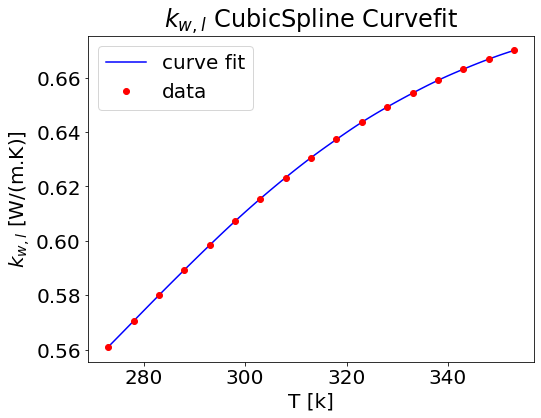

In [16]:
#plotting curve fit for thermal conductivity of water

T = np.arange(0,80.01,1) + 273 #K
f_kwl = interpolate.CubicSpline(T_w, k_wl)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f_kwl(T), 'b', T_w, k_wl, 'ro')
plt.title('$k_{w,l}$ CubicSpline Curvefit')
plt.xlabel('T [k]')
plt.ylabel('$k_{w,l}$ [W/(m.K)]')
plt.legend(['curve fit','data'])
plt.show()

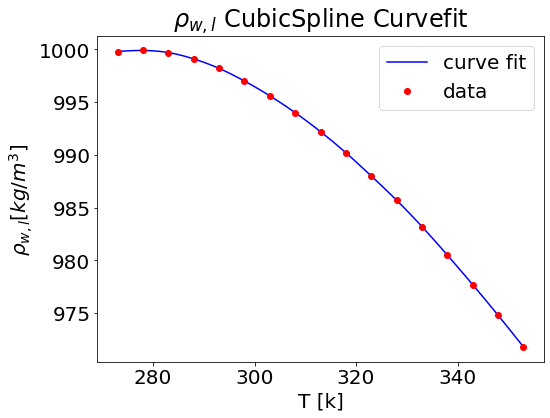

In [17]:
#plotting curve fit for density of water

T = np.arange(0,80.01,1) + 273 #K
f_Rwl = interpolate.CubicSpline(T_w, rho_wl)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f_Rwl(T), 'b', T_w, rho_wl, 'ro')
plt.title('$\u03C1_{w,l}$ CubicSpline Curvefit')
plt.xlabel('T [k]')
plt.ylabel('$\u03C1_{w,l} [kg/m^3]$')
plt.legend(['curve fit','data'])
plt.show()

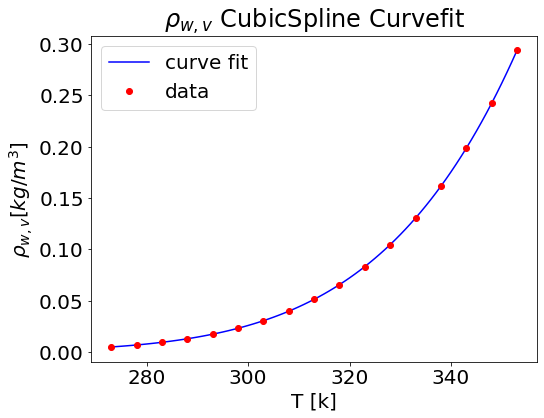

In [18]:
#plotting curve fit for density of steam

T = np.arange(0,80.01,1) + 273 #K
f_Rwv = interpolate.CubicSpline(T_w, rho_wv)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f_Rwv(T), 'b', T_w, rho_wv, 'ro')
plt.title('$\u03C1_{w,v}$ CubicSpline Curvefit')
plt.xlabel('T [k]')
plt.ylabel('$\u03C1_{w,v} [kg/m^3]$')
plt.legend(['curve fit','data'])
plt.show()

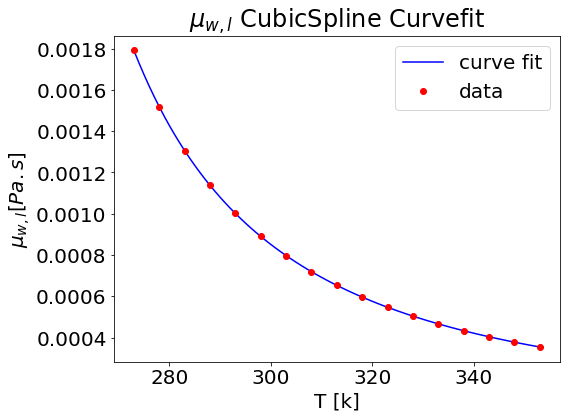

In [19]:
#plotting curve fit for viscosity of water

T = np.arange(0,80.01,1) + 273 #K
f_Mwl = interpolate.CubicSpline(T_w, mu_wl)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f_Mwl(T), 'b', T_w, mu_wl, 'ro')
plt.title('$\mu_{w,l}$ CubicSpline Curvefit')
plt.xlabel('T [k]')
plt.ylabel('$\mu_{w,l} [Pa.s]$')
plt.legend(['curve fit','data'])
plt.show()

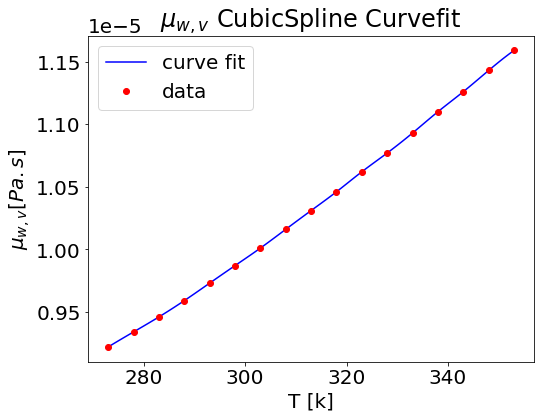

In [20]:
#plotting curve fit for viscosity of steam

T = np.arange(0,80.01,1) + 273 #K
f_Mwv = interpolate.CubicSpline(T_w, mu_wv)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f_Mwv(T), 'b', T_w, mu_wv, 'ro')
plt.title('$\mu_{w,v}$ CubicSpline Curvefit')
plt.xlabel('T [k]')
plt.ylabel('$\mu_{w,v} [Pa.s]$')
plt.legend(['curve fit','data'])
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression

Pw = np.log(np.array([0.00061, 0.00087, 0.00123, 0.00171, 0.00234, 0.00317, 0.00425, 0.00563, 0.00738, 0.00959, 0.01235, 0.01576, 0.01995, 0.02504, 0.03120, 0.03860, 0.04741])*10**6) # Pa



reg = LinearRegression().fit((1/T_w).reshape(17,1), Pw.reshape(17,1))
print(reg.score((1/T_w).reshape(17,1), Pw.reshape(17,1)))
print(reg.coef_)
print(reg.intercept_)

0.9999000791527767
[[-5239.73271457]]
[25.633291]


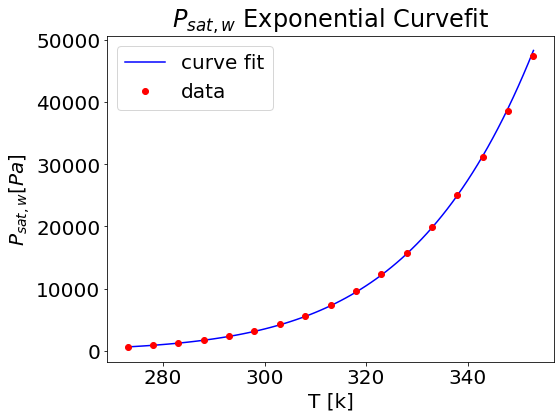

In [21]:
P = np.array([0.00061, 0.00087, 0.00123, 0.00171, 0.00234, 0.00317, 0.00425, 0.00563, 0.00738, 0.00959, 0.01235, 0.01576, 0.01995, 0.02504, 0.03120, 0.03860, 0.04741])*10**6
T = np.arange(0,80.01,1) + 273#K
P_w = lambda x: np.exp(25.63 - 5240/x)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, P_w(T), 'b', T_w, P, 'ro')
plt.title('$P_{sat,w}$ Exponential Curvefit')
plt.xlabel('T [k]')
plt.ylabel('$P_{sat,w} [Pa]$')
plt.legend(['curve fit','data'])

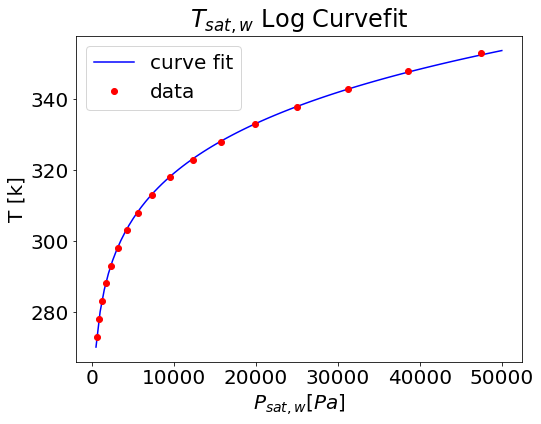

In [35]:
Pw = np.array([0.00061, 0.00087, 0.00123, 0.00171, 0.00234, 0.00317, 0.00425, 0.00563, 0.00738, 0.00959, 0.01235, 0.01576, 0.01995, 0.02504, 0.03120, 0.03860, 0.04741])*10**6 # Pa

#plotting curve fit for saturated temperature

P = np.linspace(0,50000,100) #K
# f_Tw = interpolate.CubicSpline(Pw, T_w)
T_satw = lambda x: 5240/(25.63-np.log(x))
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(P[1:], T_satw(P[1:]), 'b', Pw, T_w, 'ro')
plt.title('$T_{sat,w}$ Log Curvefit')
plt.xlabel('$P_{sat,w} [Pa]$')
plt.ylabel('T [k]')
plt.legend(['curve fit','data'])
plt.show()

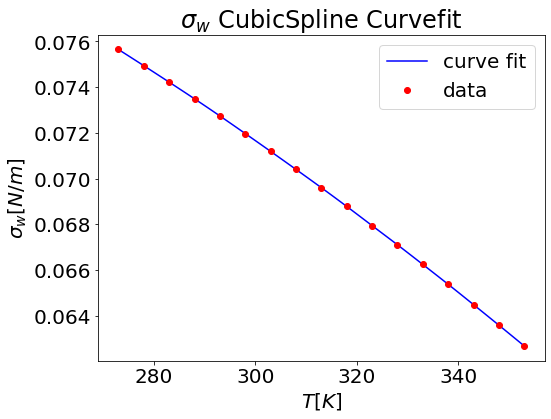

In [23]:
#plotting curve fit for saturated surface tension water liquid
sigma_w = np.array([75.65, 74.94, 74.22, 73.49, 72.74, 71.97, 71.19, 70.40, 69.60, 68.78, 67.94, 67.10, 66.24, 65.37, 64.48, 63.58, 62.67]) * 10**-3 #J/Kg

T = np.arange(0,80.01,1) + 273 #K
f_sigmaw = interpolate.CubicSpline(T_w, sigma_w)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f_sigmaw(T), 'b', T_w, sigma_w, 'ro')
plt.title('$\sigma_{w}$ CubicSpline Curvefit')
plt.xlabel('$T [K]$')
plt.ylabel('$\sigma_{w} [N/m]$')
plt.legend(['curve fit','data'])
plt.show()

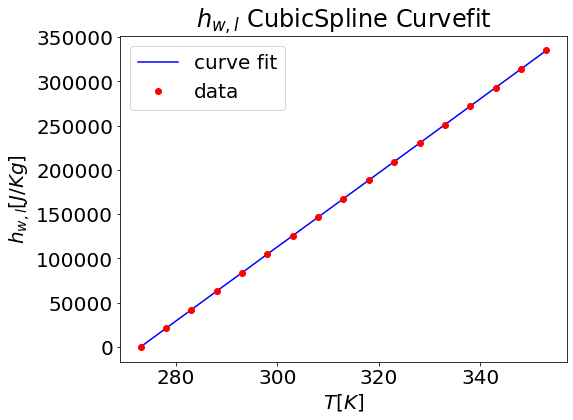

In [14]:
#plotting curve fit for saturated enthalpy water liquid
h_wl = np.array([0.00, 21.02, 42.02, 62.98, 83.91, 104.83, 125.73, 146.63, 167.53, 188.43, 209.34, 230.26, 251.18, 272.12, 293.07, 314.03, 335.01]) * 10**3 #J/Kg

T = np.arange(0,80.01,1) + 273 #K
f_hwl = interpolate.CubicSpline(T_w, h_wl)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f_hwl(T), 'b', T_w, h_wl, 'ro')
plt.title('$h_{w,l}$ CubicSpline Curvefit')
plt.xlabel('$T [K]$')
plt.ylabel('$h_{w,l} [J/Kg]$')
plt.legend(['curve fit','data'])
plt.show()

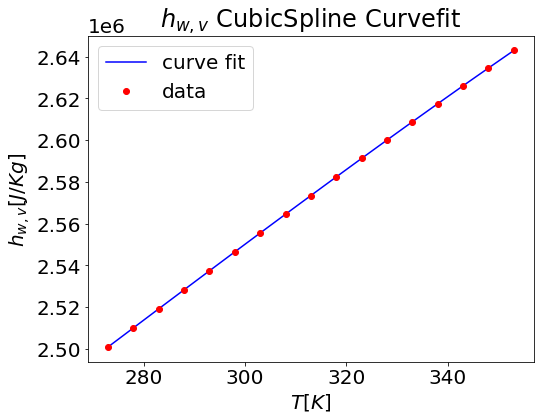

In [15]:
#plotting curve fit for saturated enthalpy water liquid
h_wv = np.array([2500.92, 2510.06, 2519.21, 2528.33, 2537.43, 2546.51, 2555.55, 2564.55, 2573.51, 2582.43, 2591.29, 2600.09, 2608.83, 2617.50, 2626.10, 2634.60, 2643.02])*10**3 # J/Kg

T = np.arange(0,80.01,1) + 273 #K
f_hwv = interpolate.CubicSpline(T_w, h_wv)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f_hwv(T), 'b', T_w, h_wv, 'ro')
plt.title('$h_{w,v}$ CubicSpline Curvefit')
plt.xlabel('$T [K]$')
plt.ylabel('$h_{w,v} [J/Kg]$')
plt.legend(['curve fit','data'])
plt.show()

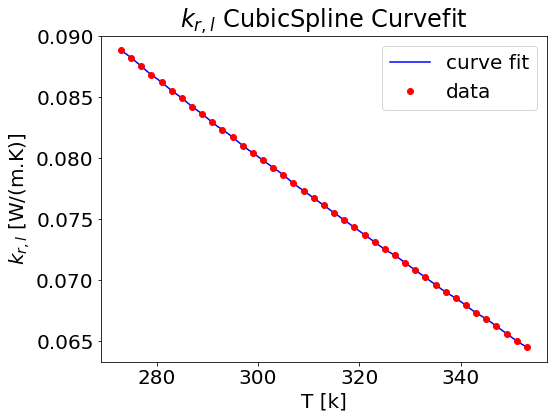

In [24]:
#plotting curve fit for thermal conductivity of water

T = np.arange(0,80.01,1) + 273 #K
f_Kr = interpolate.CubicSpline(T_r, k_rl)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f_Kr(T), 'b', T_r, k_rl, 'ro')
plt.title('$k_{r,l}$ CubicSpline Curvefit')
plt.xlabel('T [k]')
plt.ylabel('$k_{r,l}$ [W/(m.K)]')
plt.legend(['curve fit','data'])
plt.show()

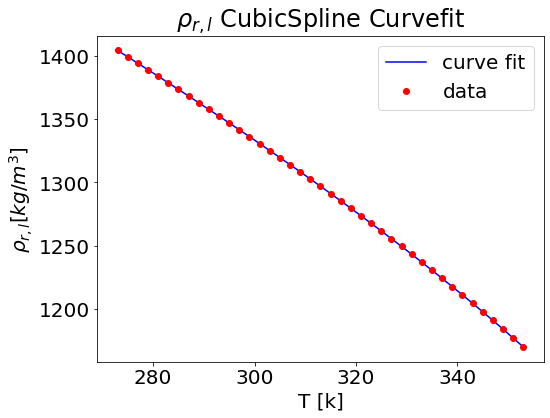

In [25]:
#plotting curve fit for density of water

T = np.arange(0,80.01,1) + 273 #K
f_Rrl = interpolate.CubicSpline(T_r, rho_rl)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f_Rrl(T), 'b', T_r, rho_rl, 'ro')
plt.title('$\u03C1_{r,l}$ CubicSpline Curvefit')
plt.xlabel('T [k]')
plt.ylabel('$\u03C1_{r,l} [kg/m^3]$')
plt.legend(['curve fit','data'])
plt.show()

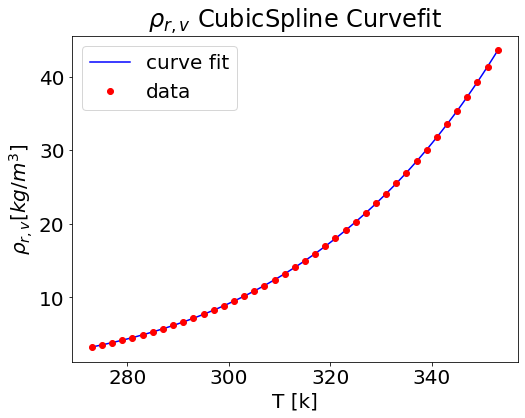

In [26]:
#plotting curve fit for density of steam

T = np.arange(0,80.01,1) + 273 #K
f_Rrv = interpolate.CubicSpline(T_r, rho_rv)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f_Rrv(T), 'b', T_r, rho_rv, 'ro')
plt.title('$\u03C1_{r,v}$ CubicSpline Curvefit')
plt.xlabel('T [k]')
plt.ylabel('$\u03C1_{r,v} [kg/m^3]$')
plt.legend(['curve fit','data'])
plt.show()

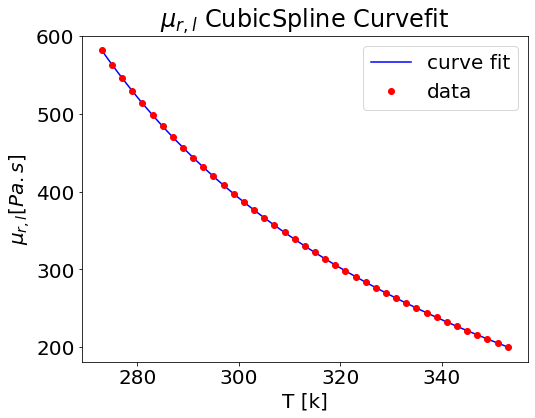

In [27]:
#plotting curve fit for viscosity of water

T = np.arange(0,80.01,1) + 273 #K
f_Mrl = interpolate.CubicSpline(T_r, mu_rl)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f_Mrl(T), 'b', T_r, mu_rl, 'ro')
plt.title('$\mu_{r,l}$ CubicSpline Curvefit')
plt.xlabel('T [k]')
plt.ylabel('$\mu_{r,l} [Pa.s]$')
plt.legend(['curve fit','data'])
plt.show()

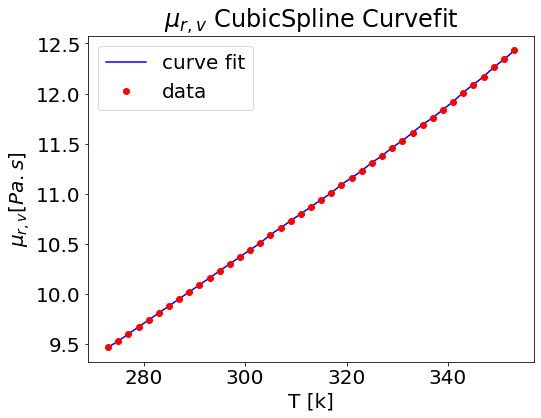

In [28]:
#plotting curve fit for viscosity of steam

T = np.arange(0,80.01,1) + 273 #K
f_Mrv = interpolate.CubicSpline(T_r, mu_rv)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f_Mrv(T), 'b', T_r, mu_rv, 'ro')
plt.title('$\mu_{r,v}$ CubicSpline Curvefit')
plt.xlabel('T [k]')
plt.ylabel('$\mu_{r,v} [Pa.s]$')
plt.legend(['curve fit','data'])
plt.show()

In [29]:
Pr = np.log(np.array([0.05359, 0.05866, 0.06411, 0.0699, 0.07622, 0.08293, 0.09009, 0.09774, 0.1058, 0.11457, 0.12380, 0.13360, 0.14400, 0.15503, 0.16670, 0.17904, 0.19209, 0.20586, 0.22038, 0.23568, 0.2519, 0.26873, 0.28654, 0.30523, 0.32485, 0.34542, 0.36696, 0.38951, 0.4131, 0.43777, 0.46353, 0.49043, 0.51849, 0.54774, 0.57823, 0.60998, 0.64302, 0.67739, 0.71313, 0.75026, 0.78882])*10**6)

# Pw = np.array([0.00061, 0.00087, 0.00123, 0.00171, 0.00234, 0.00317, 0.00425, 0.00563, 0.00738, 0.00959, 0.01235, 0.01576, 0.01995, 0.02504, 0.03120, 0.03860, 0.04741])*10**6 # Pa
Tr = 1/T_r


#Evaluating constants

reg = LinearRegression().fit(Tr.reshape(len(T_r),1), Pr.reshape(len(T_r),1))
print(reg.score(Tr.reshape(len(T_r),1), Pr.reshape(len(T_r),1)))
print(reg.coef_)
print(reg.intercept_)



0.999843261739318
[[-3232.96778871]]
[22.75459291]


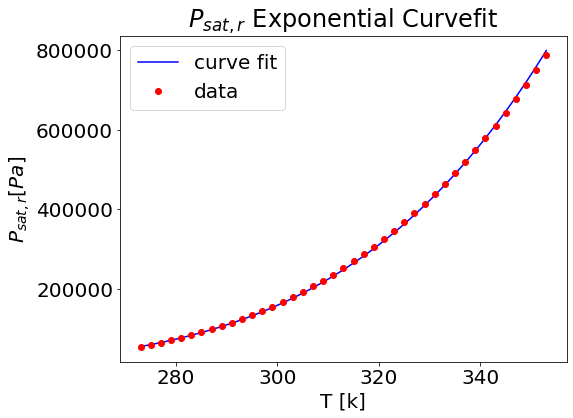

In [30]:
T_ = np.arange(0,80.01,1) + 273 #K

P_r = lambda x: np.exp(22.75 - 3233/x)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T_, P_r(T_), 'b', T_r, np.exp(Pr), 'ro')
plt.title('$P_{sat,r}$ Exponential Curvefit')
plt.xlabel('T [k]')
plt.ylabel('$P_{sat,r} [Pa]$')
plt.legend(['curve fit','data'])
plt.show()

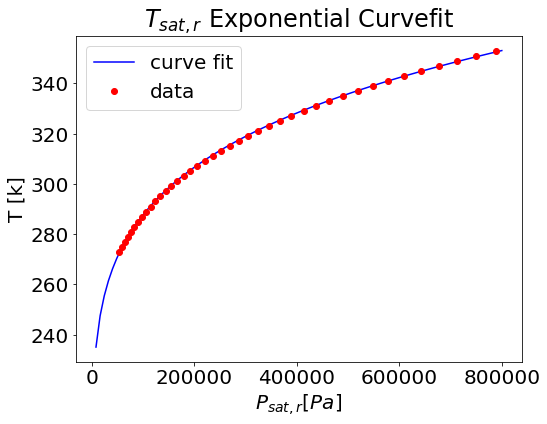

In [33]:
31#plotting curve fit for saturated temperature

P = np.linspace(0,800000,100) #K
T_satr = lambda x: 3233/(22.75 - np.log(x))
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(P[1:], T_satr(P[1:]), 'b', np.exp(Pr), T_r, 'ro')
plt.title('$T_{sat,r}$ Exponential Curvefit')
plt.xlabel('$P_{sat,r} [Pa]$')
plt.ylabel('T [k]')
plt.legend(['curve fit','data'])
plt.show()

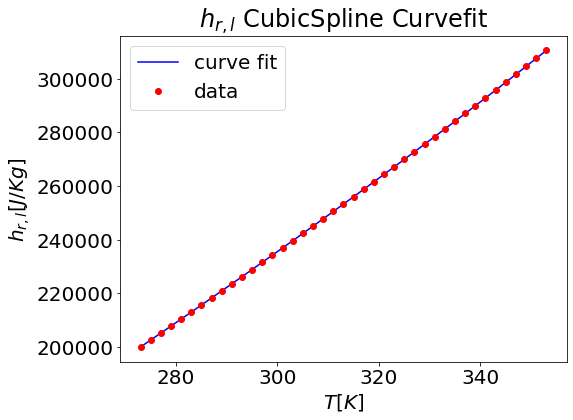

In [36]:
#plotting curve fit for saturated enthalpy refrigerant liquid
h_rl = np.array([200.00, 202.59, 205.18, 207.78, 210.39, 213.00, 215.63, 218.26, 220.90, 223.54, 226.20, 228.86, 231.54, 234.22, 236.91, 239.60, 242.31, 245.03, 247.75, 250.49, 253.24, 255.99, 258.76, 261.53, 264.32, 267.11, 269.92, 272.74, 275.57, 278.41, 281.26, 284.13, 287.01, 289.90, 292.80, 295.71, 298.64, 301.59, 304.55, 307.52, 310.50]) * 10**3 #J/Kg

T = np.arange(0,80.01,1) + 273 #K
f_hrl = interpolate.CubicSpline(T_r, h_rl)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f_hrl(T), 'b', T_r, h_rl, 'ro')
plt.title('$h_{r,l}$ CubicSpline Curvefit')
plt.xlabel('$T [K]$')
plt.ylabel('$h_{r,l} [J/Kg]$')
plt.legend(['curve fit','data'])
plt.show()

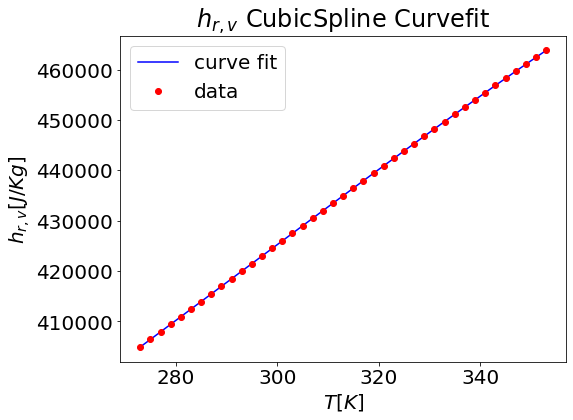

In [37]:
#plotting curve fit for saturated enthalpy water liquid
h_rv = np.array([404.93, 406.43, 407.93, 409.44, 410.94, 412.45, 413.95, 415.46, 416.97, 418.47, 419.98, 421.48, 422.99, 424.49, 425.99, 427.49, 428.99, 430.49, 431.99, 433.48, 434.97, 436.46, 437.95, 439.43, 440.91, 442.38, 443.85, 445.32, 446.78, 448.24, 449.69, 451.13, 452.57, 454.00, 455.43, 456.85, 458.25, 459.66, 461.05, 462.43, 463.80, ])*10**3 # J/Kg

T = np.arange(0,80.01,1) + 273 #K
f_hrv = interpolate.CubicSpline(T_r, h_rv)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f_hrv(T), 'b', T_r, h_rv, 'ro')
plt.title('$h_{r,v}$ CubicSpline Curvefit')
plt.xlabel('$T [K]$')
plt.ylabel('$h_{r,v} [J/Kg]$')
plt.legend(['curve fit','data'])
plt.show()

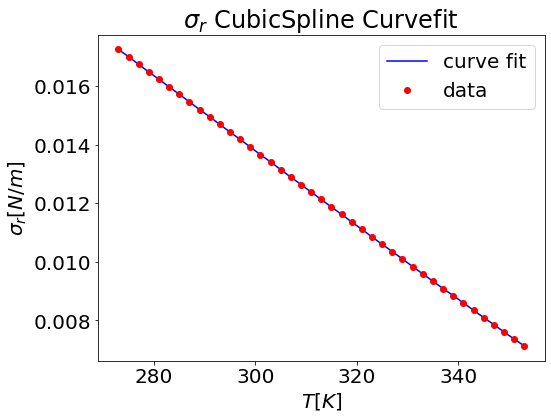

In [38]:
#plotting curve fit for saturated surface tension water liquid
sigma_r = np.array([17.25, 17.00, 16.74, 16.48, 16.23, 15.97, 15.72, 15.46, 15.20, 14.95, 14.69, 14.43, 14.18, 13.92, 13.66, 13.41, 13.15, 12.89, 12.64, 12.38, 12.13, 11.87, 11.62, 11.36, 11.11, 10.85, 10.60, 10.35, 10.10, 9.84, 9.59, 9.34, 9.09, 8.85, 8.60, 8.35, 8.10, 7.86, 7.61, 7.37, 7.13]) * 10**-3 #J/Kg

T = np.arange(0,80.01,1) + 273 #K
f_sigmar = interpolate.CubicSpline(T_r, sigma_r)
fig = plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 20})
plt.plot(T, f_sigmar(T), 'b', T_r, sigma_r, 'ro')
plt.title('$\sigma_{r}$ CubicSpline Curvefit')
plt.xlabel('$T [K]$')
plt.ylabel('$\sigma_{r} [N/m]$')
plt.legend(['curve fit','data'])
plt.show()

## Function to evaluate steady state operation point

In [39]:
# function to evaluate steady state operation point

def steady_operation_point(fluid, D_p, t_w, L_e, L_a, L_c, A_ai_to_A_e, A_ao_to_A_c, h_ai, h_ao, Ti, To, w, k, r_p, theta, k_m):
  '''
  This function evaluates the steady operation point of a heat exchanger
  '''
  m = 0
  E = 100
  q_dot = 50
 
   
  T_avg = (Ti+To)/2
  if fluid == 'water':
    hlv = f_hwv(T_avg) - f_hwl(T_avg)
    rho_v = f_Rwv(T_avg)
    rho_l = f_Rwl(T_avg)
    mu_v = f_Mwv(T_avg)
    k_l = f_kwl(T_avg)
    sigma = f_sigmaw(T_avg)
    mu_l = f_Mwl(T_avg)
    P_sat = P_w
  elif fluid == 'R245fa':
    hlv = f_hrv(T_avg) - f_hrl(T_avg)
    rho_v = f_Rrv(T_avg)
    rho_l = f_Rrl(T_avg)
    mu_v = f_Mrv(T_avg)
    k_l = f_Kr(T_avg)
    sigma = f_sigmar(T_avg)
    mu_l = f_Mrl(T_avg)
    P_sat = P_r

  while np.abs(E) > 10**-3 and m<2000:
    m_dot = q_dot/hlv
    D_v = D_p - 2*t_w
    A_v = np.pi*D_v**2/4
    L_eff = 0.5*L_e + L_a + 0.5*L_c
    V_v = m_dot/(rho_v*A_v)
    Re_v = rho_v*V_v*D_v/mu_v
    A_w = (np.pi/4)*(D_p**2 - (D_p - 2*t_w)**2)

    # evaluating the Re number
    if Re_v < 2300:
      f_v = 16/Re_v
    else:
      f_v = 0.023*Re_v**(-0.2)

    k_w = k_l*((k_l+k_m)-(1-w)*(k_l-k_m))/((k_l+k_m)+(1-w)*(k_l-k_m))

    U_e = 1/(t_w/k_w + 1/(h_ai*(A_ai_to_A_e)))
    U_c = 1/(t_w/k_w + 1/(h_ao*(A_ao_to_A_c)))


    U_e_4 = 1/(.5*t_w/k_w + 1/(h_ai*(A_ai_to_A_e)))
    U_c_3 = 1/(.5*t_w/k_w + 1/(h_ao*(A_ao_to_A_c)))

    A_e = np.pi*D_p*L_e
    A_c = np.pi*D_p*L_c

    r_e = 2*sigma/(4*f_v*(L_eff/D_v)*rho_v*V_v**2/2 + mu_l*L_eff*m_dot/(k*rho_l*A_w))
    if r_e < r_p*np.cos(theta):
      print(f'r_p/cos: {r_p*np.cos(theta)}')
      print('The capillary limit has been exceeded therefore no solution is possible')
      break

    R = 461.5 #J/KgK

    T_2 = To + q_dot/(U_c*A_c)
    
    
    P_2 = P_sat(T_2)
    P_1 = P_2 + 4*f_v*(L_eff/D_v)*mu_v*D_v**2/2

    

    # using Psat equation and equation 1 yields
    if fluid == 'water':
      T_1 = (5240+2*sigma/(r_e*rho_l*R))/(25.63-np.log(P_1))
  
    q_dotn = U_e*A_e*(Ti - T_1)
    E = q_dotn - q_dot
  
    q_dot = q_dot + 0.01*E
    m += 1
  P_3 = P_2
  P_4 = P_1 - 2*sigma/r_e
  
  q_dot_2 = -U_c * A_c*(To-T_2)
  T_3 = To + q_dot_2/(U_c_3*A_c)
  T_4 = Ti - q_dot/(U_e_4*A_c)

  # if fluid == 'water':
  #   T_3 = T_satw(P_3)
  #   T_4 = T_satw(P_4) + R*T_satw(P_4)**2*2*sigma/(hlv*P_4*r_e)

  print(f'T_1: {T_1}')
  print(f'T_2: {T_2}')
  print(f'P1 : {P_1} P1eq:, {P_sat(T_1)*np.exp( -(2*sigma)/(r_e*rho_l*R*T_1))}')
  print(f'E: {np.abs(E)}')
  print(f'q_dotn: {q_dotn} and q_dot: {q_dot}')
  print(f'iterations: {m}')
  print(P_1, 'P1')
  print(P_2,'P2')
  return q_dot,q_dot_2, T_1, T_2, T_3, T_4, P_1, P_2, P_3, P_4


In [40]:
# function to evaluate steady state operation point

def steady_operation_point(fluid, D_p, t_w, L_e, L_a, L_c, A_ai_to_A_e, A_ao_to_A_c, h_ai, h_ao, Ti, To, w, k, r_p, theta, k_m):
  '''
  This function evaluates the steady operation point of a heat exchanger
  '''
  m = 0
  E = 100
  q_dot = 50
 
   
  T_avg = (Ti+To)/2
  if fluid == 'water':
    hlv = f_hwv(T_avg) - f_hwl(T_avg)
    rho_v = f_Rwv(T_avg)
    rho_l = f_Rwl(T_avg)
    mu_v = f_Mwv(T_avg)
    k_l = f_kwl(T_avg)
    sigma = f_sigmaw(T_avg)
    mu_l = f_Mwl(T_avg)
    P_sat = P_w
  elif fluid == 'R245fa':
    hlv = f_hrv(T_avg) - f_hrl(T_avg)
    rho_v = f_Rrv(T_avg)
    rho_l = f_Rrl(T_avg)
    mu_v = f_Mrv(T_avg)
    k_l = f_Kr(T_avg)
    sigma = f_sigmar(T_avg)
    mu_l = f_Mrl(T_avg)
    P_sat = P_r

  while np.abs(E) > 10**-3 and m<20000000000000:
    m_dot = q_dot/hlv #Does the units work out here?
    D_v = D_p - 2*t_w
    A_v = np.pi*D_v**2/4
    L_eff = 0.5*L_e + L_a + 0.5*L_c
    V_v = m_dot/(rho_v*A_v)
    Re_v = rho_v*V_v*D_v/mu_v
    A_w = (np.pi/4)*(D_p**2 - (D_p - 2*t_w)**2)

    # evaluating the Re number
    if Re_v < 2300:
      f_v = 16/Re_v
    else:
      f_v = 0.023*Re_v**(-0.2)

    k_w = k_l*((k_l+k_m)-(1-w)*(k_l-k_m))/((k_l+k_m)+(1-w)*(k_l-k_m))

    U_e = 1/(t_w/k_w + 1/(h_ai*(A_ai_to_A_e)))
    U_c = 1/(t_w/k_w + 1/(h_ao*(A_ao_to_A_c)))


    U_e_4 = 1/(.5*t_w/k_w + 1/(h_ai*(A_ai_to_A_e)))
    U_c_3 = 1/(.5*t_w/k_w + 1/(h_ao*(A_ao_to_A_c)))

    U_e_cond = 1/(1/(h_ai*(A_ai_to_A_e)))
    U_c_cond = 1/(1/(h_ao*(A_ao_to_A_c)))

    A_e = np.pi*D_p*L_e
    A_c = np.pi*D_p*L_c

    r_e = 2*sigma/(4*f_v*(L_eff/D_v)*rho_v*V_v**2/2 + mu_l*L_eff*m_dot/(k*rho_l*A_w))
    if r_e < r_p/np.cos(theta):
      print(f'r_p/cos: {r_p/np.cos(theta)}')
      print(f'r_e: {r_e}')
      print('The capillary limit has been exceeded therefore no solution is possible')
      break

    R = 461.5 #J/KgK

    T_2 = To + q_dot/(U_c*A_c)
    
    
    P_2 = P_sat(T_2)
    P_1 = P_2 + 4*f_v*(L_eff/D_v)*mu_v*D_v**2/2

    

    # using Psat equation and equation 1 yields
    if fluid == 'water':
      T_1 = (5240+2*sigma/(r_e*rho_l*R))/(25.63-np.log(P_1))

    # using Psat equation and equation 1 yields
    if fluid == 'R245fa':
      T_1 = (3233+2*sigma/(r_e*rho_l*R))/(22.75-np.log(P_1))
  
    q_dotn = U_e*A_e*(Ti - T_1)
    E = q_dotn - q_dot
  
    q_dot = q_dot + 0.01*E
    m += 1
  P_3 = P_2
  P_4 = P_1 - 2*sigma/r_e
  
  q_dot_2 = -U_c * A_c*(To-T_2)

  T_3 = To + q_dot_2/(U_c_3*A_c)
  T_4 = Ti -q_dot_2/(U_e_4*A_e)
  if fluid == 'water':
    T_4 = T_satw(P_4) + R*T_satw(P_4)**2*2*sigma/(hlv*P_4*r_e)
  elif fluid == 'R245fa':
    T_4 = Ti -q_dot_2/(U_e_4*A_e)
    #T_4 = T_satr(P_4) + R*T_satr(P_4)**2*2*sigma/(hlv*P_4*r_e)

  T_i_cond = Ti - q_dot_2/(U_e_cond*A_e)
  T_o_cond = To + q_dot_2/(U_c_cond*A_c)
  
  #   T_3 = T_satw(P_3)

  #Calculating max heat transfer rate, Part 3c)
  #To do this, we assume r_e to be the smallest it can be.
  #This relation comes about from eq.(9), where the heat transfer rate
  #Is directly proportional to the mass flow
  #Then from eq.(8)
  #From eq(2), the smallest r_e can be is r_p
  #r_e = 2*sigma/(4*f_v*(L_eff/D_v)*rho_v*V_v**2/2 + mu_l*L_eff*m_dot/(k*rho_l*A_w))
  m_dot_max = ((2*sigma)/(r_p))/(((32*mu_v*L_eff)/((D_v**2)*rho_v*A_v)) + ((mu_l*L_eff)/(k*rho_l*A_w)))
  V_max = m_dot_max/(rho_v*A_v)
  Re_max = rho_v*V_max*D_v/mu_v
  q_max = m_dot_max * hlv

  print('max flow', m_dot_max)
  print("Max Reynolds number", Re_max)
  print('Max Velocity', V_max)
  print('max heat transfer rate', q_max)

  

  print(f'T_1: {T_1}')
  print(f'T_2: {T_2}')
  print(f'P1 : {P_1} P1eq:, {P_sat(T_1)*np.exp( -(2*sigma)/(r_e*rho_l*R*T_1))}')
  print(f'E: {np.abs(E)}')
  print(f'q_dotn: {q_dotn} and q_dot: {q_dot}')
  print(f'iterations: {m}')
  print(P_1, 'P1')
  print(P_2,'P2')
  return q_dot,q_dot_2, T_1, T_2, T_3, T_4,T_i_cond,T_o_cond, P_1, P_2, P_3, P_4


In [41]:
#Problems 2-3 

steady_operation_point('water', 15*10**-3, 0.457*10**-3, 25*10**-2, 25*10**-2, 25*10**-2, 5, 5, 93, 93, 41+273, 25.5+273, .68, 1.94*10**-10, 0.063*10**-3, 10*np.pi/180, 386)

max flow 2.4223307119727136e-05
Max Reynolds number 216.64107471643442
Max Velocity 4.2948876865522365
max heat transfer rate 58.671028108455914
T_1: 306.25019434445545
T_2: 306.25001866732424
P1 : 5013.035813258625 P1eq:, 5013.035813258623
E: 0.000991600870989373
q_dotn: 36.07647449665729 and q_dot: 36.07745618151957
iterations: 508
5013.035813258625 P1
5013.035813241526 P2


(36.07745618151957,
 36.07746609752822,
 306.25019434445545,
 306.25001866732424,
 305.6678592626381,
 307.1326689342795,
 307.41430014204803,
 305.08569985795197,
 5013.035813258625,
 5013.035813241526,
 5013.035813241526,
 3633.340779998385)

In [42]:
#Problem 4
#Reduce A_ai_to_Ae and A_ao_to_Ac 40% by multplying it by .6 (3/5)
steady_operation_point('water', 15*10**-3, 0.457*10**-3, 25*10**-2, 25*10**-2, 25*10**-2, 3, 3, 93, 93, 41+273, 25.5+273, .68, 1.94*10**-10, 0.063*10**-3, 10*np.pi/180, 386)

max flow 2.4223307119727136e-05
Max Reynolds number 216.64107471643442
Max Velocity 4.2948876865522365
max heat transfer rate 58.671028108455914
T_1: 306.25022200370074
T_2: 306.25010985676977
P1 : 5013.0613535332795 P1eq:, 5013.061353533294
E: 0.0009861784465172718
q_dotn: 23.029751069583803 and q_dot: 23.030727386245854
iterations: 541
5013.0613535332795 P1
5013.061353506494 P2


(23.030727386245854,
 23.030737248030377,
 306.25022200370074,
 306.25010985676977,
 305.8784773188983,
 306.5547873269142,
 306.99315521897313,
 305.50684478102687,
 5013.0613535332795,
 5013.061353506494,
 5013.061353506494,
 4132.3067654053175)

In [99]:
#Problem 5
# using the refrigerant to find the steady state operating condition
steady_operation_point('R245fa', 34*10**-3, 0.49*10**-3, 25*10**-2, 25*10**-2, 25*10**-2, 5, 5, 93, 93, 41+273, 25.5+273, 0.67, 6*10**-2, 0.065*10**-6, 10*np.pi/180, 386)

max flow 0.024758986177732124
Max Reynolds number 0.0897731539570082
Max Velocity 2.5533992565191266
max heat transfer rate 4603.120671723564
T_1: 306.8378284754196
T_2: 305.6623672560385
P1 : 201485.50599352634 P1eq:, 201485.50599352602
E: 0.0009843842687971005
q_dotn: 36.02041821803863 and q_dot: 36.021392758464735
iterations: 556
201485.50599352634 P1
193487.86817387046 P2


(36.021392758464735,
 36.021402602307525,
 306.8378284754196,
 305.6623672560385,
 303.5316540344103,
 308.9683459655897,
 311.09905918721796,
 301.40094081278204,
 201485.50599352634,
 193487.86817387046,
 193487.86817387046,
 198358.67408163656)

In [100]:
# using the refrigerant to find the steady state operating condition with 50% more energy
steady_operation_point('R245fa', 3.16*10**-2, 0.19*10**-3, 25*10**-2, 25*10**-2, 25*10**-2, 5, 5, 93, 93, 41+273, 25.5+273, 0.679, 6*10**-2, 0.000063*10**-3, 10*np.pi/180, 386)

max flow 0.020347172150545153
Max Reynolds number 0.07803004469137757
Max Velocity 2.3473522729656406
max heat transfer rate 3782.8886879677366
T_1: 306.60070311494457
T_2: 305.89916238196577
P1 : 199847.31938405134 P1eq:, 199847.31938405157
E: 0.0009817026902609882
q_dotn: 54.005522678863066 and q_dot: 54.004550793199705
iterations: 471
199847.31938405134 P1
195078.57841592646 P2


(54.004550793199705,
 54.00454097617262,
 306.60070311494457,
 305.89916238196577,
 304.53933609659515,
 307.96066390340485,
 309.32049018877547,
 303.17950981122453,
 199847.31938405134,
 195078.57841592646,
 195078.57841592646,
 193961.92188529408)

In [101]:
# using the refrigerant to find the steady state operating condition with 90 W power
steady_operation_point('R245fa', 5.5*10**-2, 0.19*10**-3, 25*10**-2, 25*10**-2, 25*10**-2, 5, 5, 93, 93, 41+273, 25.5+273, 0.682, 6*10**-2, 0.000063*10**-3, 10*np.pi/180, 386)

max flow 0.18574898196931325
Max Reynolds number 0.40716031461013086
Max Velocity 7.001048055421289
max heat transfer rate 34533.92527936182
T_1: 306.892979736508
T_2: 305.606942670758
P1 : 201869.6027715027 P1eq:, 201869.6027715027
E: 0.0009832772501709997
q_dotn: 90.062187204551 and q_dot: 90.06121376007333
iterations: 626
201869.6027715027 P1
193117.06773967788 P2


(90.06121376007333,
 90.06120392730116,
 306.892979736508,
 305.606942670758,
 304.2952990242685,
 308.2047009757315,
 309.516344622221,
 302.983655377779,
 201869.6027715027,
 193117.06773967788,
 193117.06773967788,
 200794.4730030592)